In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [3]:
df = pd.read_csv('Crop_recommendation.csv')

In [4]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [5]:
#Checking whether dataset is balanced or not
df['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

We can conclude, given dataset is perfectly balanced

# Classification using Decision Tree

In [6]:
c=df.label.astype('category')
targets = dict(enumerate(c.cat.categories))
df['target']=c.cat.codes

y=df.target
X=df[['N','P','K','temperature','humidity','ph','rainfall']]

In [7]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=4)

In [8]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=42).fit(X_train,y_train)
print("Accuracy achieved in classifying the given data using Decision Tree is "+str(round(clf.score(X_test,y_test),4)))

Accuracy achieved in classifying the given data using Decision Tree is 0.9891


[Text(0.6202651515151515, 0.96875, 'x[6] <= 30.393\ngini = 0.954\nsamples = 1650\nvalue = [76, 79, 72, 70, 73, 72, 78, 71, 73, 78, 71, 72\n75, 78, 82, 79, 81, 71, 74, 76, 77, 72]'),
 Text(0.5899621212121212, 0.90625, 'gini = 0.0\nsamples = 79\nvalue = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 79, 0, 0, 0, 0, 0, 0]'),
 Text(0.6051136363636364, 0.9375, 'True  '),
 Text(0.6505681818181818, 0.90625, 'x[4] <= 27.685\ngini = 0.952\nsamples = 1571\nvalue = [76, 79, 72, 70, 73, 72, 78, 71, 73, 78, 71, 72\n75, 78, 82, 0, 81, 71, 74, 76, 77, 72]'),
 Text(0.6354166666666666, 0.9375, '  False'),
 Text(0.5378787878787878, 0.84375, 'x[2] <= 50.0\ngini = 0.499\nsamples = 148\nvalue = [0.0, 0.0, 0.0, 70.0, 0.0, 0.0, 0.0, 0.0, 0.0, 78.0\n0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0\n0.0, 0.0]'),
 Text(0.5075757575757576, 0.78125, 'gini = 0.0\nsamples = 78\nvalue = [0, 0, 0, 0, 0, 0, 0, 0, 0, 78, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 0]'),
 Text(0.5681818181818182, 0.78125, 'gini = 0.0\nsamples = 70\

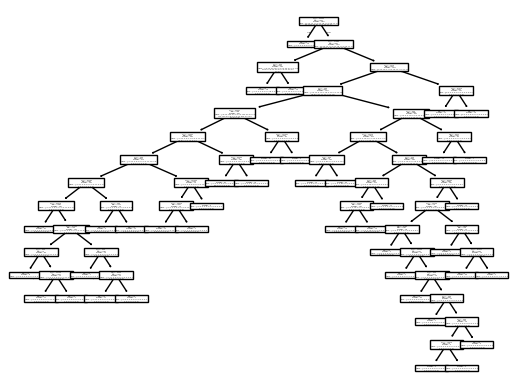

In [9]:
from sklearn import tree
tree.plot_tree(clf)

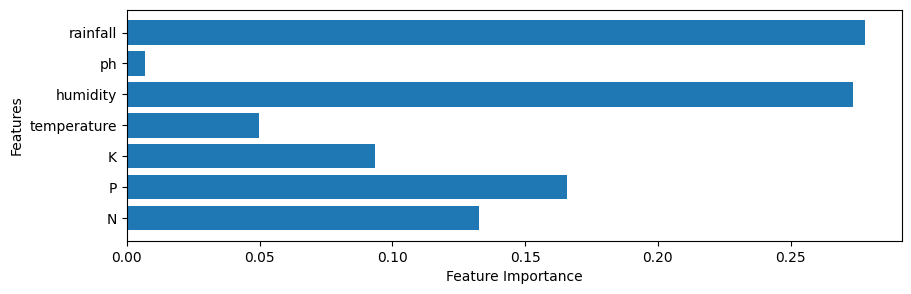

In [10]:
#Feature Importance used by Decision Tree Classifier
plt.figure(figsize=(10,3))
c_feat = len(X_train.columns)
plt.barh(range(c_feat),clf.feature_importances_)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.yticks(np.arange(c_feat),X_train.columns)
plt.show()

# Classification using Random Forest Classfier

In [11]:
from sklearn.ensemble import RandomForestClassifier
lf = RandomForestClassifier(max_depth=4,n_estimators=100,random_state=42).fit(X_train, y_train)
print('RF Accuracy on Testing Dataset: {:.2f}'.format(clf.score(X_test, y_test)))

RF Accuracy on Testing Dataset: 0.99


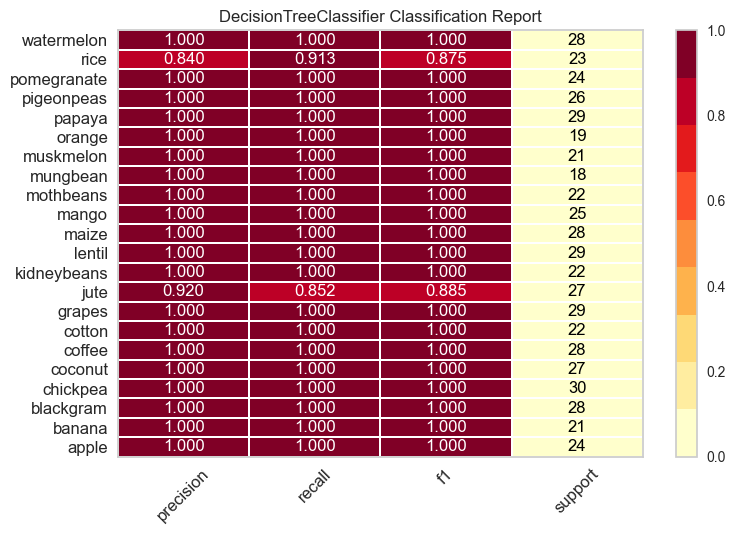

<Axes: title={'center': 'DecisionTreeClassifier Classification Report'}>

In [14]:
#Using yellowbrick to generate the RF Classification Report

from yellowbrick.classifier import ClassificationReport
classes = list(targets.values())
visualizer = ClassificationReport(clf, classes=classes, support=True)

visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)  
visualizer.show()

# Making use of Light Gradient Boosting Machine (LightGBM) for classification

In [15]:
X = df.drop(['label','target'],axis=1)
y = df['label']

In [19]:
from sklearn.model_selection import train_test_split
import lightgbm as lgb
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,shuffle = True, random_state = 0)
mo = lgb.LGBMClassifier()
mo.fit(X_train,y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000260 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1330
[LightGBM] [Info] Number of data points in the train set: 1540, number of used features: 7
[LightGBM] [Info] Start training from score -3.062872
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.105431
[LightGBM] [Info] Start training from score -3.149883
[LightGBM] [Info] Start training from score -3.035473
[LightGBM] [Info] Start training from score -3.076858
[LightGBM] [Info] Start training from score -3.062872
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.105431
[LightGBM] [Info] Start training from score -3.035473
[LightGBM] [Info] Start training from score -2.982829
[LightGBM] [Info] Start training from score -3.049078
[LightGBM] [Info] Start training from score -3.062872
[LightGBM] 

LGBMClassifier()

In [20]:
#Checking whether model underwent Overfitting Problem

print('Training set score: {:.4f}'.format(mo.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(mo.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 0.9894


Hence, this is a classical example of Overfitting

In [21]:
#Giving real time parameters to the model to predict the suitable crop
# Values --> [N, P, K, Temp, Humidity, pH, Rainfall]
t1 = mo.predict([[90, 42, 43, 20.879744, 75, 5.5,220]])
t1

array(['rice'], dtype=object)

In [22]:
t2 = mo.predict([[50, 82, 23, 80.8, 25, 2.5,20]])
t2

array(['muskmelon'], dtype=object)

In [23]:
t3 = mo.predict([[20,30,10,15,90,7.5,100]])
t3

array(['orange'], dtype=object)

# Classification using Clustering analysis

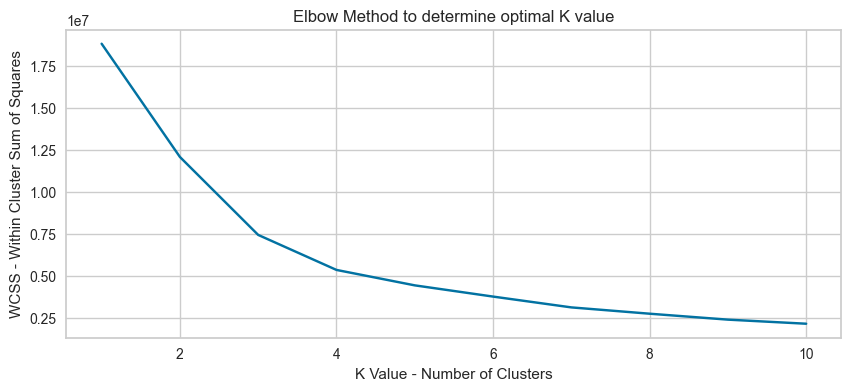

In [24]:
from sklearn.cluster import KMeans
x = df.loc[:,['N','P','K','temperature','ph','humidity','rainfall']].values


plt.figure(figsize=(10,4))
#Computing Within Cluster Sum of Squares for different k values
wcss = []
#Using K Means ++ instead of K Means so that it will ensure the initial centroids distances are far away
for i in range(1,11):
    k = KMeans(n_clusters=i,init='k-means++',max_iter = 300, n_init = 10, random_state = 0)
    k.fit(x)
    wcss.append(k.inertia_)

plt.plot(range(1,11),wcss)
plt.xlabel('K Value - Number of Clusters')
plt.ylabel('WCSS - Within Cluster Sum of Squares')
plt.title('Elbow Method to determine optimal K value')
plt.show()

We can conclude, after picking number of clusters greater than 4 the model started showing constant linearity

####  K Means Clustering 

In [25]:
#Performing K Means Clustering by forming 4 clusters

km = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

a = df['label']
y_means = pd.DataFrame(y_means)
z = pd.concat([y_means, a], axis = 1)
z = z.rename(columns = {0: 'cluster'})

In [26]:
print("Crops in 1st Cluster:", z[z['cluster'] == 0]['label'].unique())
print("Crops in 2nd Cluster:", z[z['cluster'] == 1]['label'].unique())
print("Crops in 3rd Cluster:", z[z['cluster'] == 2]['label'].unique())
print("Crops in 4th Cluster:", z[z['cluster'] == 3]['label'].unique())

Crops in 1st Cluster: ['grapes' 'apple']
Crops in 2nd Cluster: ['maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans' 'mungbean'
 'blackgram' 'lentil' 'pomegranate' 'mango' 'orange' 'papaya' 'coconut']
Crops in 3rd Cluster: ['maize' 'banana' 'watermelon' 'muskmelon' 'papaya' 'cotton' 'coffee']
Crops in 4th Cluster: ['rice' 'pigeonpeas' 'papaya' 'coconut' 'jute' 'coffee']


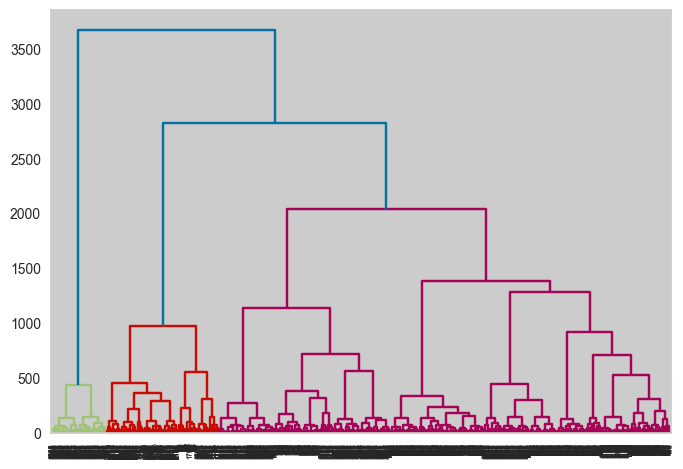

In [27]:
#plotting dendrogram for viewing the Clustering
import scipy.cluster.hierarchy as shc

dendro = shc.dendrogram(shc.linkage(x,method='ward'))
plt.show()

####  Hierachical Clustering 

In [28]:
#Performing Hierarchial Clustering by forming 4 clusters
from sklearn.cluster import AgglomerativeClustering  
hc= AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')  
y_her= hc.fit_predict(x)  

b = df['label']
y_herr = pd.DataFrame(y_her)
w = pd.concat([y_herr, b], axis = 1)
w= w.rename(columns = {0: 'cluster'})

print("Crops in First Cluster:", w[w['cluster'] == 0]['label'].unique())
print("Crops in Second Cluster:", w[w['cluster'] == 1]['label'].unique())
print("Crops in Third Cluster:", w[w['cluster'] == 2]['label'].unique())
print("Crops in Forth Cluster:", w[w['cluster'] == 3]['label'].unique())

Crops in First Cluster: ['chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans' 'mungbean' 'blackgram'
 'lentil' 'pomegranate' 'mango' 'orange' 'coconut']
Crops in Second Cluster: ['maize' 'blackgram' 'banana' 'watermelon' 'muskmelon' 'papaya' 'cotton']
Crops in Third Cluster: ['rice' 'papaya' 'coconut' 'jute' 'coffee']
Crops in Forth Cluster: ['grapes' 'apple']


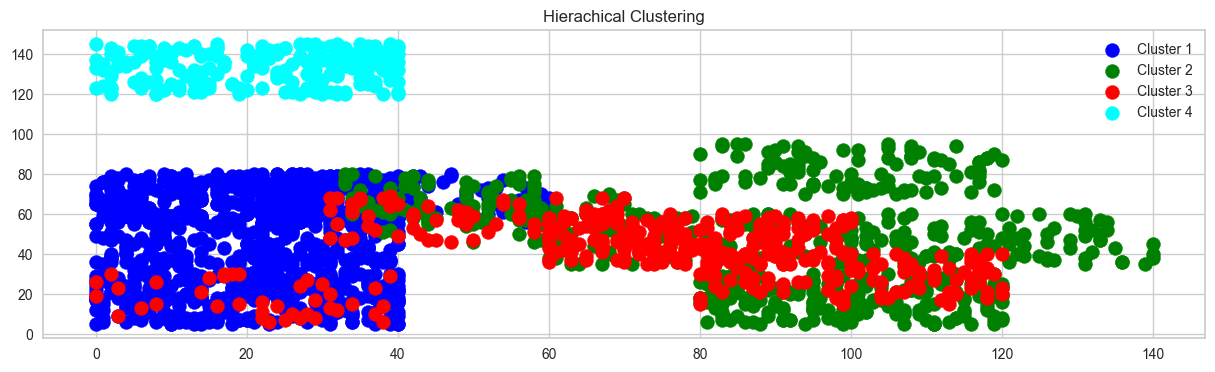

In [29]:
plt.figure(figsize=(15,4))
plt.scatter(x[y_her == 0, 0], x[y_her == 0, 1], s = 100, c = 'blue', label = 'Cluster 1')  
plt.scatter(x[y_her == 1, 0], x[y_her == 1, 1], s = 100, c = 'green', label = 'Cluster 2')  
plt.scatter(x[y_her== 2, 0], x[y_her == 2, 1], s = 100, c = 'red', label = 'Cluster 3')  
plt.scatter(x[y_her == 3, 0], x[y_her == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')  
plt.title('Hierachical Clustering')  
plt.legend()  
plt.show()